In [1]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

Unable to import DataStreamSyncer and Recorder! Likely due to missing multiprocess


Using TensorFlow backend.


In [2]:
mode = "depth"
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = f"{mode}_ims"
config["model"]["settings"]["name"] = f"sdmaskrcnn_finetune_{mode}"
config["save_conf_name"] = f"sdmaskrcnn_finetune_{mode}_00.yaml"

In [4]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 402s 3s/step - loss: 0.4283 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.0670 - mrcnn_class_loss: 0.0720 - mrcnn_bbox_loss: 0.0877 - mrcnn_mask_loss: 0.1965 - val_loss: 0.7284 - val_rpn_class_loss: 0.0215 - val_rpn_bbox_loss: 0.2038 - val_mrcnn_class_loss: 0.0870 - val_mrcnn_bbox_loss: 0.1457 - val_mrcnn_mask_loss: 0.2703
Epoch 2/10
150/150 [==============================] - 201s 1s/step - loss: 0.3432 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.0659 - mrcnn_class_loss: 0.0422 - mrcnn_bbox_loss: 0.0746 - mrcnn_mask_loss: 0.1542 - val_loss: 0.4402 - val_rpn_class_loss: 0.0021 - val_rpn_bbox_loss: 0.1382 - val_mrcnn_class_loss: 0.0476 - val_mrcnn_bbox_loss: 0.0991 - val_mrcnn_mask_loss: 0.1531
Epoch 3/10
150/150 [==============================] - 127s 846ms/step - loss: 0.3842 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0836 - mrcnn_mask_loss: 0.1592 - val_loss: 0.6774 - val_rpn_clas

In [5]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_depth20181220T1353/mask_rcnn_sdmaskrcnn_finetune_depth_0007.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Loading weights from  models/sdmaskrcnn_finetune_depth20181220T1353/mask_rcnn_sdmaskrcnn_finetune_depth_0007.h5
Re-starting from epoch 7


{'rois': array([[326, 296, 428, 402],
       [ 89,  91, 280, 286],
       [259, 382, 412, 510],
       [247, 234, 344, 333]], dtype=int32), 'scores': array([0.9999813 , 0.9998988 , 0.99983907, 0.99938154], dtype=float32), 'class_ids': array([1, 1, 1, 1], dtype=int32)}
(512, 512, 4)


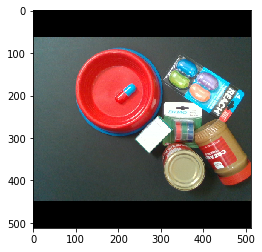

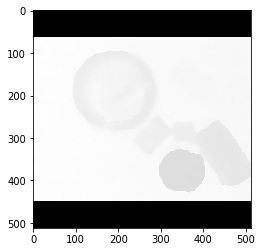

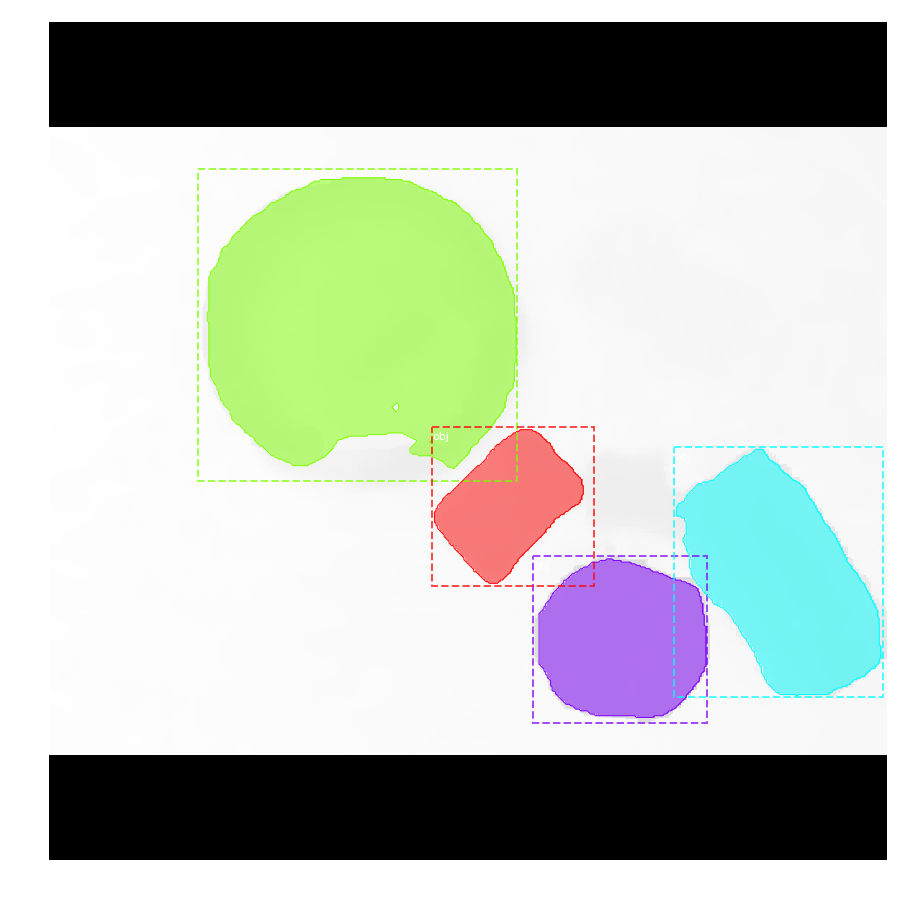

{'rois': array([[335, 310, 437, 419],
       [330, 351, 360, 387],
       [342, 188, 440, 262]], dtype=int32), 'scores': array([0.9999467 , 0.96178466, 0.95384574], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


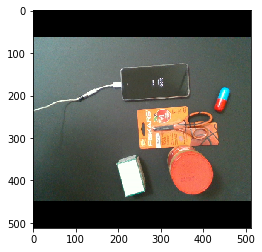

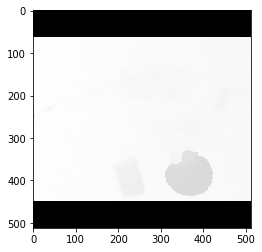

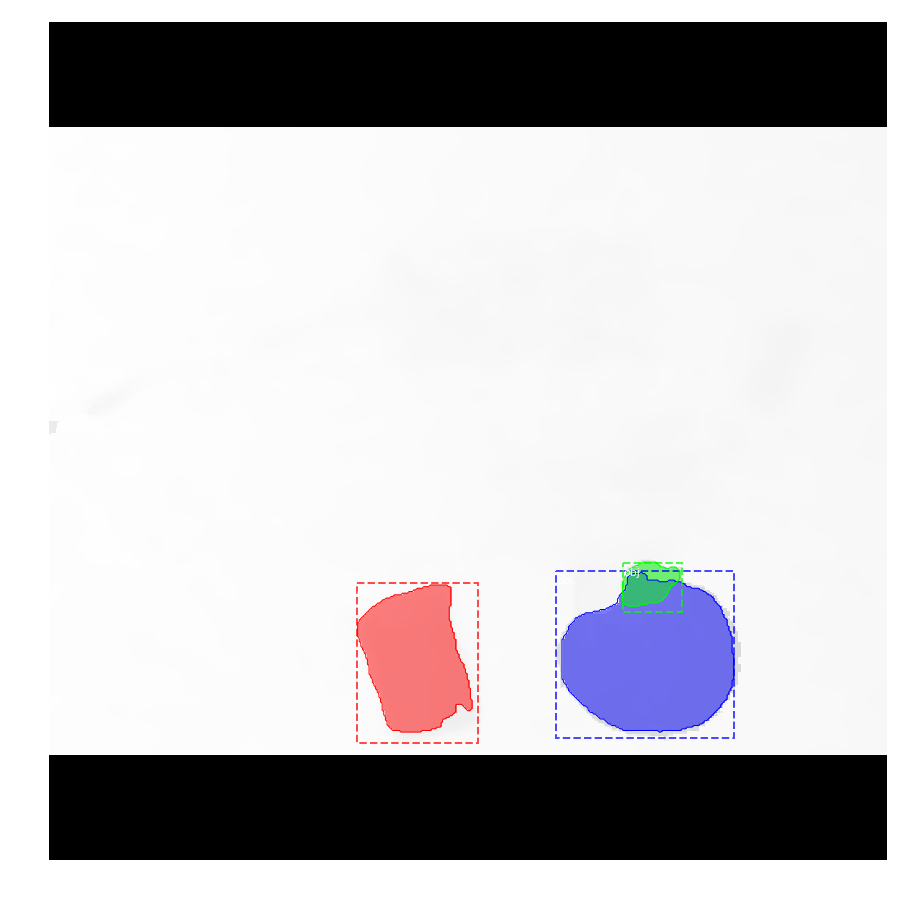

{'rois': array([[164, 318, 225, 386]], dtype=int32), 'scores': array([0.9999665], dtype=float32), 'class_ids': array([1], dtype=int32)}
(512, 512, 1)


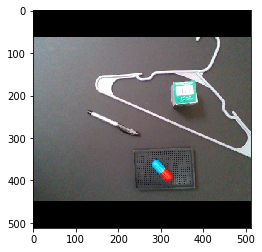

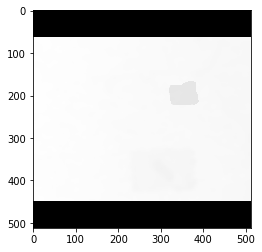

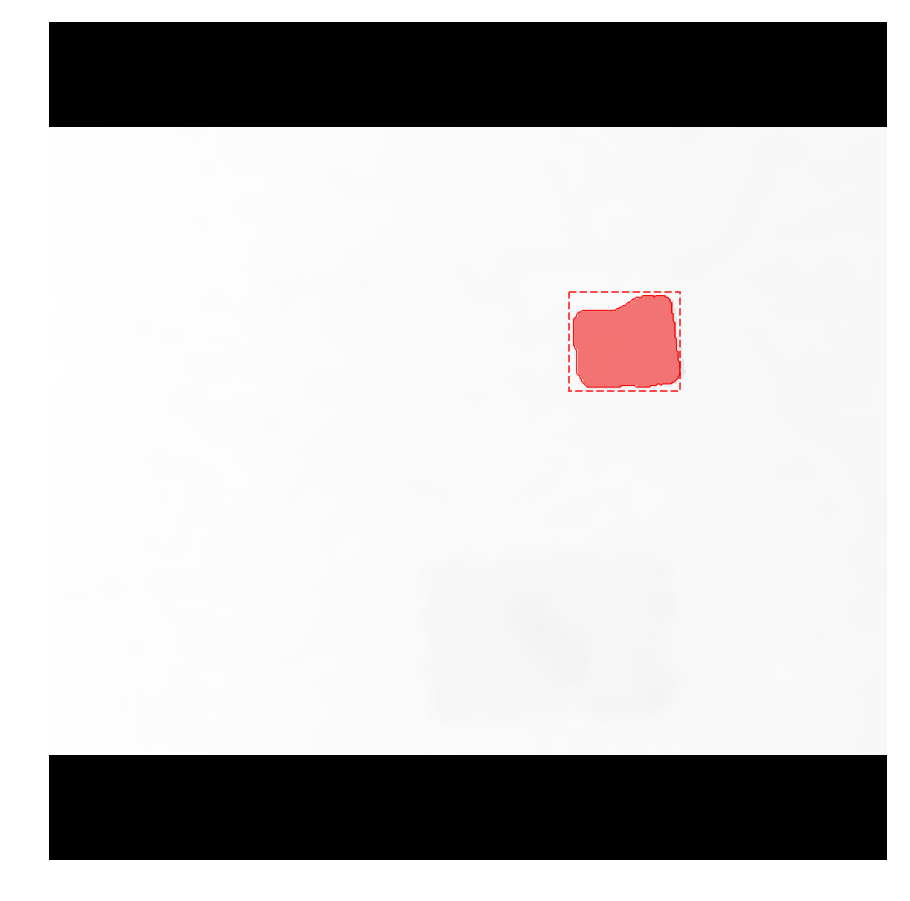

{'rois': array([[268, 133, 377, 240],
       [153, 199, 253, 286],
       [234, 324, 339, 416],
       [212, 304, 275, 382],
       [335, 347, 414, 443],
       [254, 227, 383, 300],
       [160, 254, 260, 365],
       [179, 398, 261, 508],
       [218, 307, 249, 358],
       [116, 374, 178, 468],
       [ 82,  86, 190, 243]], dtype=int32), 'scores': array([0.9999703 , 0.99981326, 0.99674463, 0.98984617, 0.95634055,
       0.9457496 , 0.937126  , 0.9023677 , 0.8693426 , 0.8513898 ,
       0.8115871 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 11)


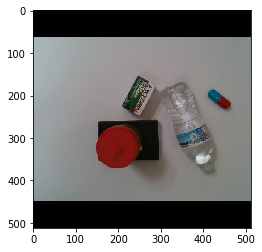

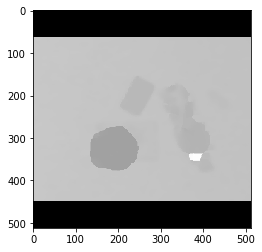

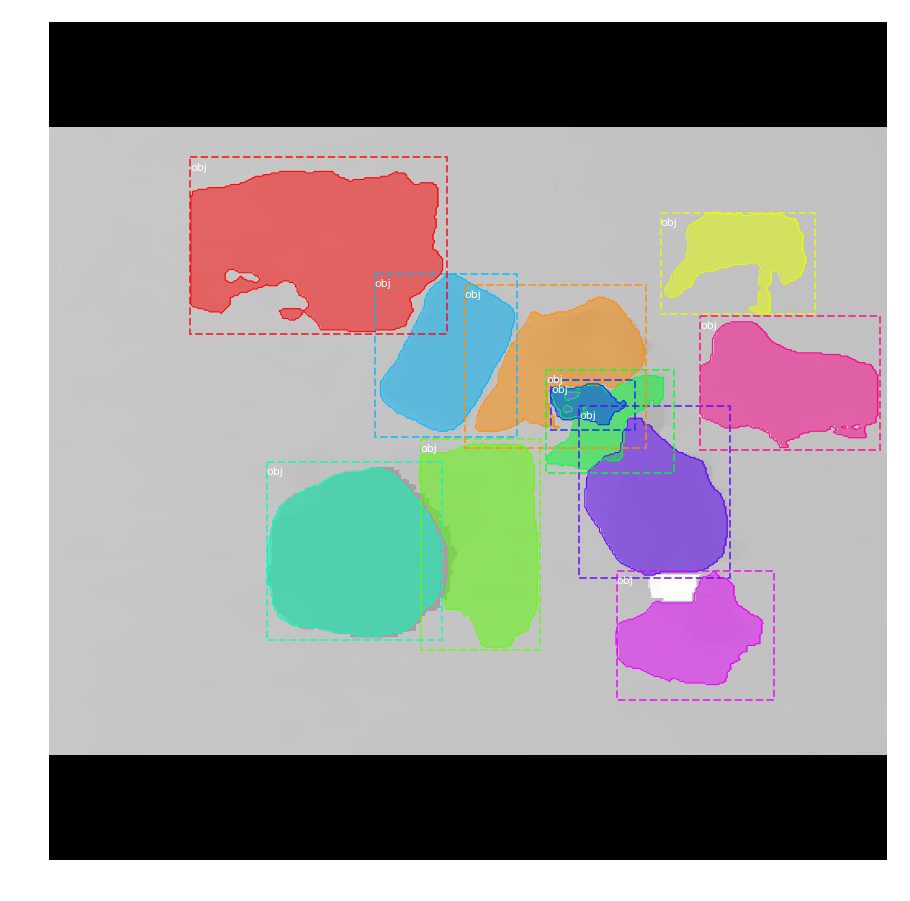

{'rois': array([[293, 276, 364, 348]], dtype=int32), 'scores': array([0.9964844], dtype=float32), 'class_ids': array([1], dtype=int32)}
(512, 512, 1)


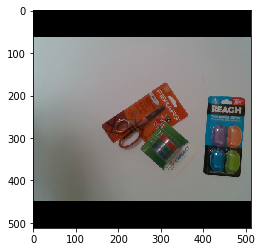

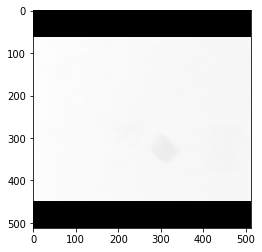

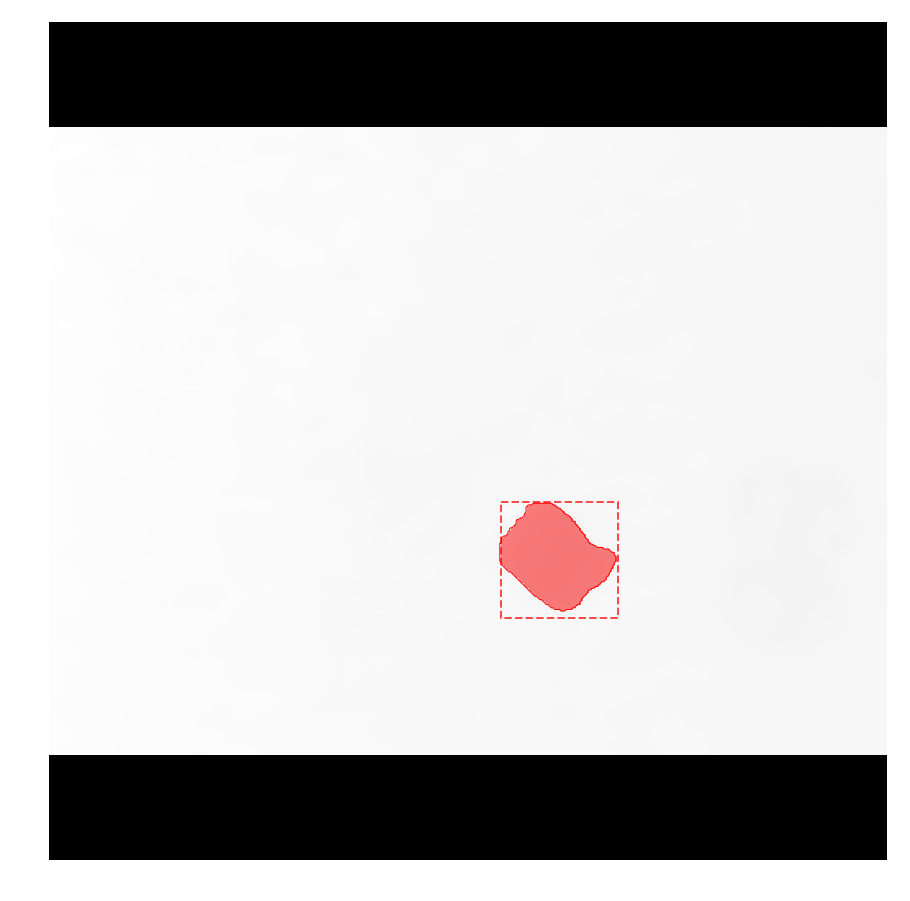

{'rois': array([[169, 220, 381, 431],
       [165, 425, 238, 501]], dtype=int32), 'scores': array([0.9999654, 0.9873174], dtype=float32), 'class_ids': array([1, 1], dtype=int32)}
(512, 512, 2)


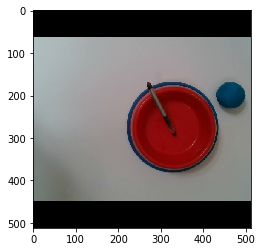

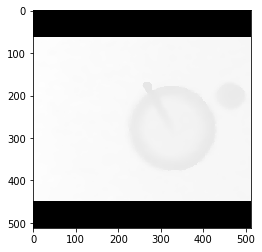

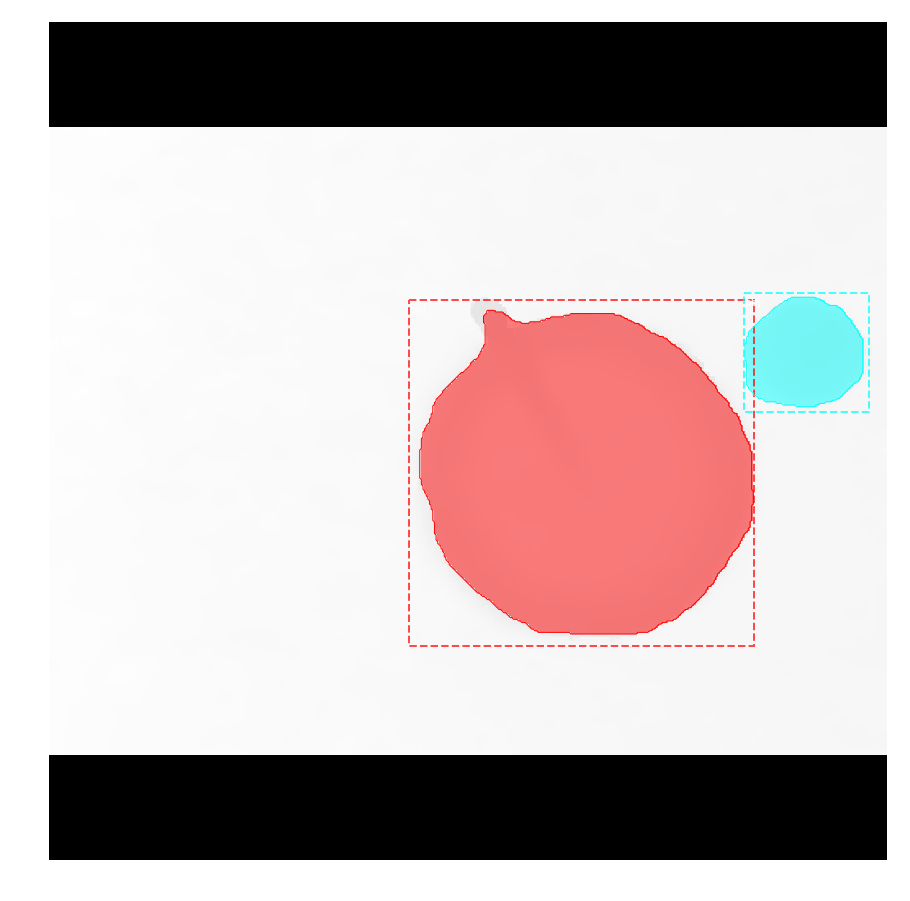

{'rois': array([[242, 255, 305, 352]], dtype=int32), 'scores': array([0.9995534], dtype=float32), 'class_ids': array([1], dtype=int32)}
(512, 512, 1)


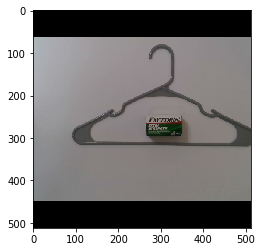

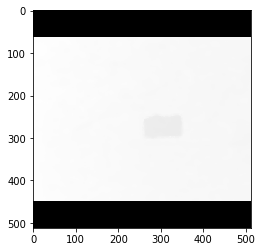

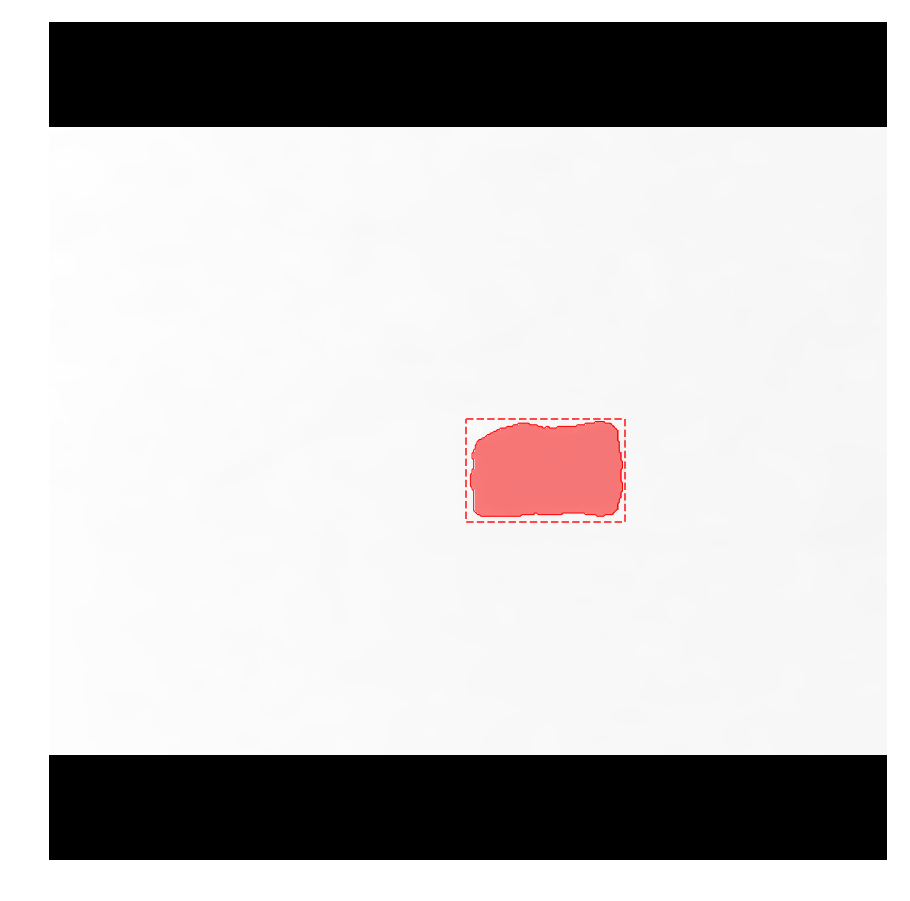

{'rois': array([[151, 258, 258, 363],
       [264, 392, 334, 466],
       [255, 360, 316, 431]], dtype=int32), 'scores': array([0.99997747, 0.99997425, 0.7996127 ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


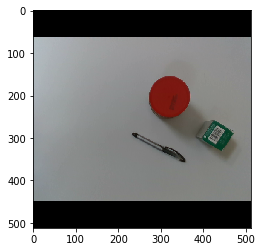

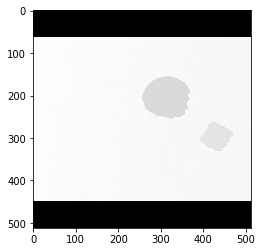

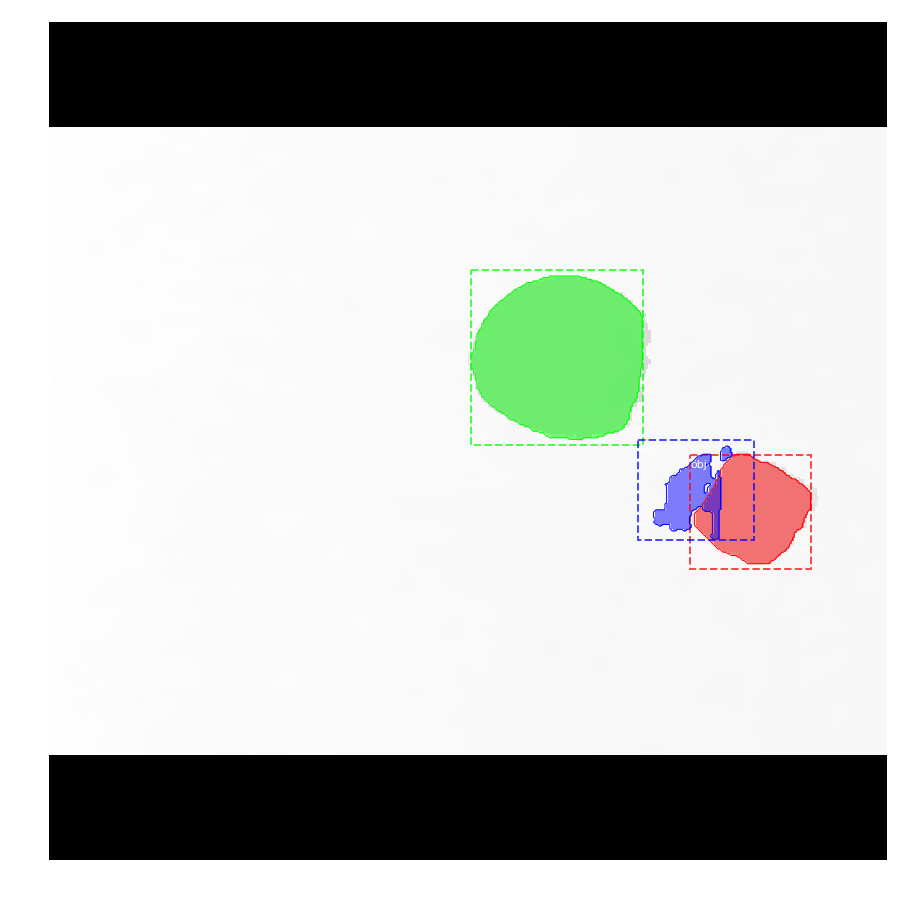

In [6]:
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"

for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))
    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=0)
    
    plt.figure()
    plt.imshow(color)
    plt.figure()
    plt.imshow(depth)
    
    detect(model, depth)